In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df=pd.read_csv('House_price_cleaned.csv')

In [207]:
df.shape

(2559, 18)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Superficie            2559 non-null   object
 1   Rooms                 2559 non-null   object
 2   Bedrooms              2559 non-null   object
 3   Price                 2559 non-null   object
 4   Location              2559 non-null   object
 5   description           2559 non-null   object
 6   Loc_Paris             2559 non-null   int64 
 7   m2                    2559 non-null   int64 
 8   nb_bat                2559 non-null   int64 
 9   nb_good               2559 non-null   object
 10  nb_bain               2559 non-null   int64 
 11  Cave                  2559 non-null   int64 
 12  balc_terr             2559 non-null   object
 13  Chauffage             2559 non-null   object
 14  Rénové                2559 non-null   int64 
 15  Parking               2559 non-null   

In [209]:
df=df[~(df.Price=='Nous consulter')]

In [210]:
#I want the column price to be numeric
df['Price_int']=df.Price.apply(lambda x: int(x.strip().replace(' ','')))
#I Want the column Loc_Paris to be treated as a categorical variable
df['Loc_Paris']=df.Loc_Paris.apply(lambda x: str(x))



In [211]:
#transform nb_good into a numerical feature
df['nb_good']=df.nb_good.apply(lambda x: int(x.replace('e','').replace('r','')))
df.nb_good.value_counts()

1     529
2     467
4     397
3     382
5     321
6     231
7      99
8      48
9      27
10     11
15      8
11      8
18      5
12      5
13      4
29      2
30      2
28      1
24      1
22      1
20      1
16      1
25      1
17      1
19      1
21      1
23      1
32      1
Name: nb_good, dtype: int64

In [212]:
#Let us create one other feature that could be interesting: 'Last_etage'

df['Last_etage']= df.apply(lambda x: 1 if x.nb_bat==x.nb_good else 0,axis=1)
df.Last_etage.value_counts()

0    2094
1     463
Name: Last_etage, dtype: int64

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557 entries, 0 to 2558
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Superficie            2557 non-null   object
 1   Rooms                 2557 non-null   object
 2   Bedrooms              2557 non-null   object
 3   Price                 2557 non-null   object
 4   Location              2557 non-null   object
 5   description           2557 non-null   object
 6   Loc_Paris             2557 non-null   object
 7   m2                    2557 non-null   int64 
 8   nb_bat                2557 non-null   int64 
 9   nb_good               2557 non-null   int64 
 10  nb_bain               2557 non-null   int64 
 11  Cave                  2557 non-null   int64 
 12  balc_terr             2557 non-null   object
 13  Chauffage             2557 non-null   object
 14  Rénové                2557 non-null   int64 
 15  Parking               2557 non-null   

In [214]:
df.describe()

,m2,nb_bat,nb_good,nb_bain,Cave,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2.557000e+03,2557.000000
mean,74.482597,6.705905,3.673445,0.675401,0.583887,0.082127,0.124364,0.232695,0.216269,1.025951e+06,0.181072
std,57.248089,3.586994,2.815973,0.748128,0.493009,0.274613,0.330061,0.422632,0.411780,1.052927e+06,0.385153
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,0.000000
25%,36.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.400000e+05,0.000000
50%,60.000000,6.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.200000e+05,0.000000
75%,94.000000,7.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.249000e+06,0.000000
max,855.000000,33.000000,32.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.970000e+07,1.000000


In [215]:
df.columns

Index(['Superficie', 'Rooms', 'Bedrooms', 'Price', 'Location', 'description',
       'Loc_Paris', 'm2', 'nb_bat', 'nb_good', 'nb_bain', 'Cave', 'balc_terr',
       'Chauffage', 'Rénové', 'Parking', 'Chauffage_Central',
       'Chauffage_Individuel', 'Price_int', 'Last_etage'],
      dtype='object')

In [216]:
#numerical variables
num=['m2','Price_int']

#categorical variables
cat=['Rooms', 'Bedrooms','nb_bat', 'nb_good', 'nb_bain','nb_good','balc_terr','Loc_Paris','Cave','Rénové', 'Parking', 'Chauffage_Central',
       'Chauffage_Individuel','Last_etage']

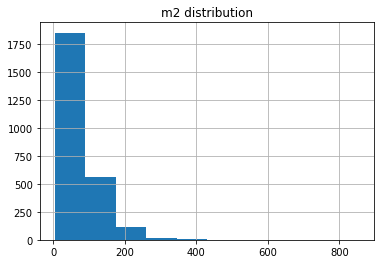

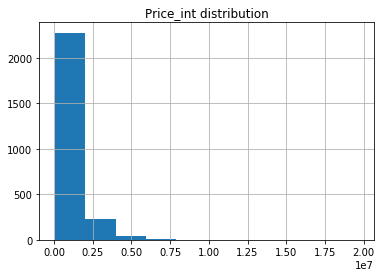

In [217]:
for i in num:
    df[i].hist()
    plt.title(f'{i} distribution')
    plt.show()

In [218]:
#m2, Price_int are not normally distributed. We will need to normalize to use some regression techniques.

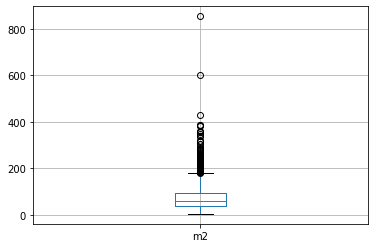

In [219]:
df.boxplot(column='m2')

In [220]:
# It seems that there are a lot of outliers


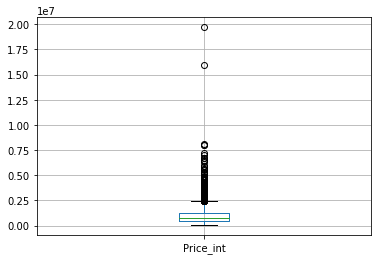

In [221]:
df.boxplot(column='Price_int')

In [222]:
# lot of outliers too

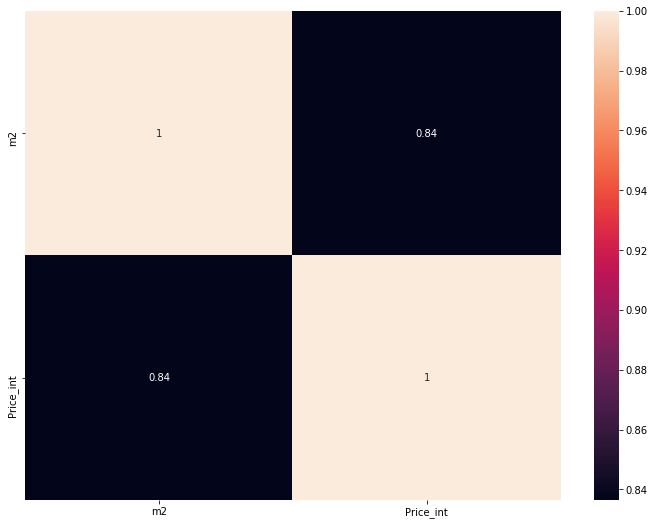

In [223]:
plt.figure(figsize=(12,9))
sns.heatmap(df[num].corr(), annot=True)

In [224]:
#Check what is correlated with what to avoid multicolinearity

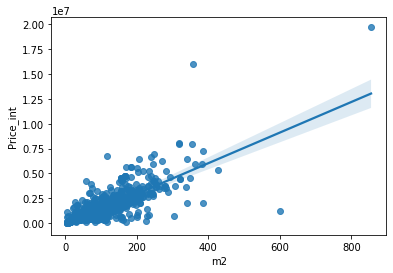

In [225]:
sns.regplot(x='m2',y='Price_int',data=df)

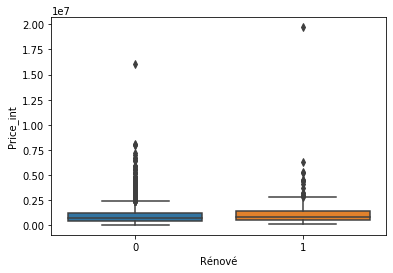

In [226]:
sns.boxplot(x='Rénové',y='Price_int',data=df)

In [227]:
#Now let us check categorical variables

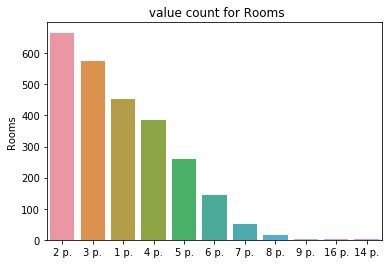

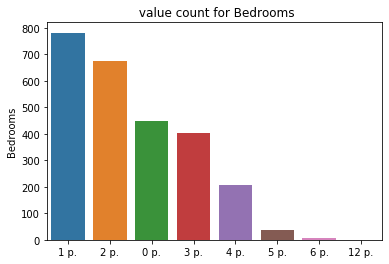

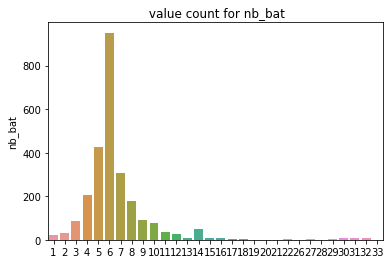

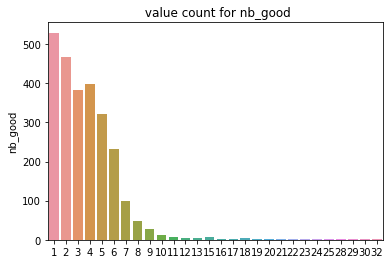

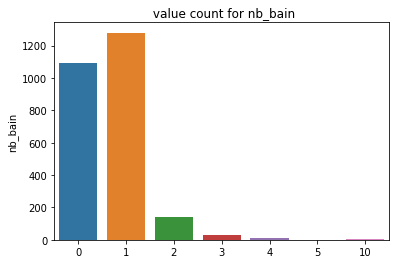

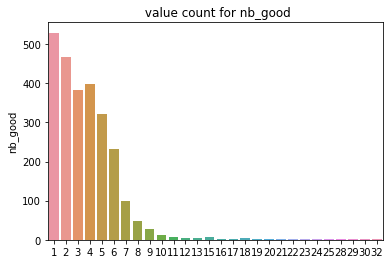

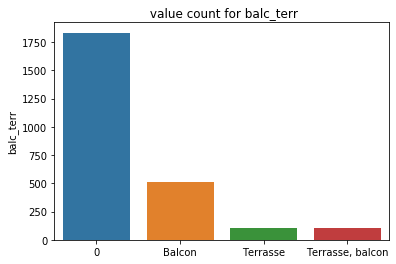

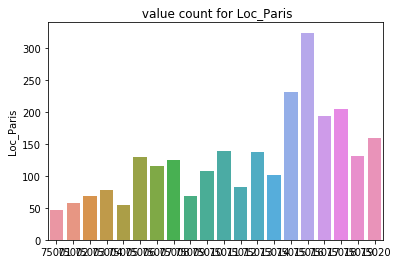

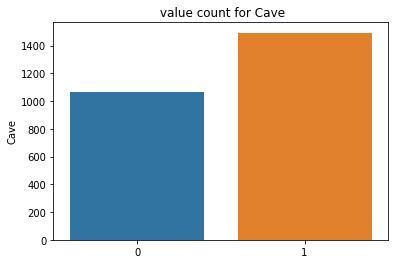

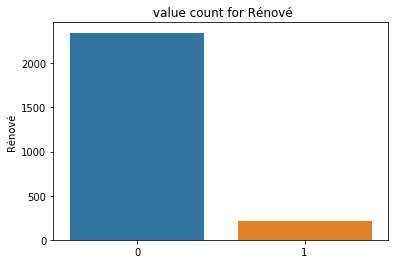

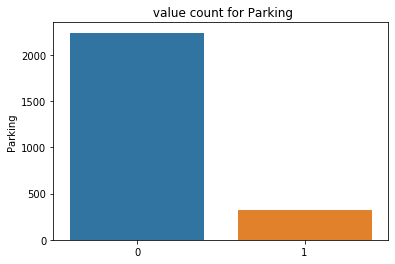

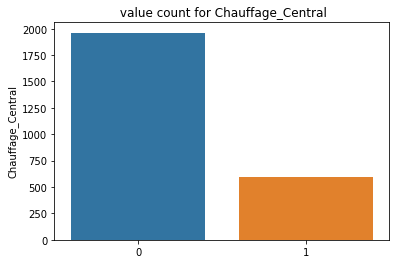

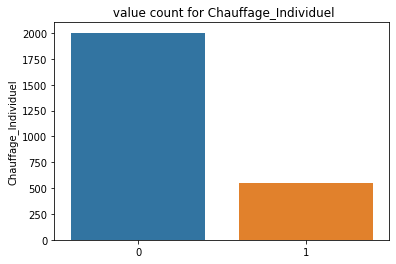

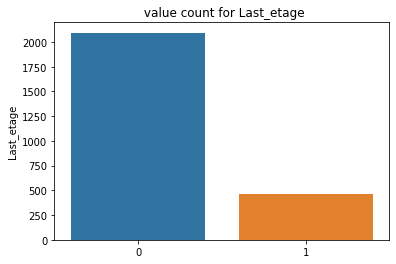

In [228]:
for i in cat:
    plt.title(f' value count for {i}')
    sns.barplot(x=df[i].value_counts().index,y=df[i].value_counts())
    plt.show()

In [229]:
pd.pivot_table(df,index='Rooms',values='Price_int',).sort_values('Price_int')

,Price_int
Rooms,
1 p.,2.951775e+05
2 p.,5.422652e+05
3 p.,8.779515e+05
4 p.,1.255668e+06
5 p.,1.831784e+06
6 p.,2.513897e+06
9 p.,2.937567e+06
7 p.,3.514078e+06
14 p.,3.680000e+06


In [230]:
pd.pivot_table(df,index='Bedrooms',values='Price_int',).sort_values('Price_int')

,Price_int
Bedrooms,
0 p.,3.165774e+05
1 p.,5.883017e+05
2 p.,1.023746e+06
3 p.,1.593779e+06
4 p.,2.482516e+06
5 p.,3.706214e+06
6 p.,4.380500e+06
12 p.,1.970000e+07


In [231]:
pd.pivot_table(df,index='nb_bain',values='Price_int',).sort_values('Price_int')

,Price_int
nb_bain,
0,6.627754e+05
1,1.083208e+06
2,2.349214e+06
3,3.656344e+06
4,4.417500e+06
5,5.950000e+06
10,7.166000e+06


In [232]:
pd.pivot_table(df,index=['Last_etage','Rooms'],values='Price_int',).sort_values('Price_int')

Price_int
Last_etage Rooms              
1          1 p.   2.194715e+05
0          1 p.   3.359817e+05
1          2 p.   5.246397e+05
0          2 p.   5.461783e+05
           3 p.   8.631554e+05
1          3 p.   9.799023e+05
0          4 p.   1.219177e+06
1          4 p.   1.530569e+06
           5 p.   1.830143e+06
0          5 p.   1.832039e+06
1          6 p.   2.387957e+06
0          6 p.   2.537640e+06
           9 p.   2.937567e+06
           7 p.   3.429196e+06
           14 p.  3.680000e+06
1          7 p.   4.295000e+06
           8 p.   5.350000e+06
0          8 p.   5.530714e+06
           16 p.  1.970000e+07

In [233]:
# This is weird, I thought that a house at last etage would be more expansive than a house that is not. We need to investigate it a bit further.

In [234]:
for i in cat:
    print(i)
    print(pd.pivot_table(df,index=i,values='Price_int',).sort_values('Price_int'))

Rooms
          Price_int
Rooms              
1 p.   2.951775e+05
2 p.   5.422652e+05
3 p.   8.779515e+05
4 p.   1.255668e+06
5 p.   1.831784e+06
6 p.   2.513897e+06
9 p.   2.937567e+06
7 p.   3.514078e+06
14 p.  3.680000e+06
8 p.   5.508125e+06
16 p.  1.970000e+07
Bedrooms
             Price_int
Bedrooms              
0 p.      3.165774e+05
1 p.      5.883017e+05
2 p.      1.023746e+06
3 p.      1.593779e+06
4 p.      2.482516e+06
5 p.      3.706214e+06
6 p.      4.380500e+06
12 p.     1.970000e+07
nb_bat
           Price_int
nb_bat              
14      3.590812e+05
29      4.742500e+05
22      4.900000e+05
28      5.150000e+05
31      5.403750e+05
27      5.522500e+05
17      5.820000e+05
20      6.460000e+05
32      6.659286e+05
18      6.949070e+05
15      7.226000e+05
30      7.254406e+05
33      7.300000e+05
16      7.355833e+05
21      7.490000e+05
13      8.333322e+05
26      8.400000e+05
2       8.557924e+05
3       8.785710e+05
12      9.225446e+05
4       9.319610e+05
11   

In [235]:
#take the log of the price
df.Price_int=np.log(df.Price_int)
df.Price_int

0       12.702596
1       14.478199
2       12.834681
3       13.521139
4       12.755638
          ...    
2554    14.467836
2555    13.567049
2556    15.319588
2557    14.862830
2558    13.340695
Name: Price_int, Length: 2557, dtype: float64

In [237]:
#transform the feature loc_Paris 
df.Loc_Paris=df.Loc_Paris.apply(lambda x: int(x)-75000)

In [238]:
df.to_csv('final_data.csv',index=False)